<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN Practice

_Authors: Joseph Nelson (DC)_

---

You're now familiar with how DBSCAN works. Let's practice it in sklearn.

We will start out working with the [NHL data](https://github.com/josephnelson93/GA-DSI/blob/master/NHL_Data_GA.csv). We're going to investigate clustering teams based on their counting stats.

[Check out this glossary of hockey terms for a reference of what the columns indicate.](http://stats.hockeyanalysis.com/glossary.php)

In [11]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### 1.  Load our data and perform any basic cleaning and/or EDA.


In [4]:
nhl = pd.read_csv('../../data/nhl.csv')
nhl.head()

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195
3,Chicago10,112,1,2020:23:00,104,83,3.09,2.46,55.6,1186,...,58.1,2093,1572,62.2,46.7,57.1,8.77,90.44,992,966
4,Vancouver12,111,1,2052:02:00,86,74,2.51,2.16,53.8,1078,...,51.0,2085,1880,61.0,55.0,52.6,7.98,93.36,1013,1049


In [5]:
# first, check out dtypes
print nhl.dtypes # TOI is an object - let's parse it

Team     object
PTS       int64
Rank      int64
TOI      object
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object


In [6]:
# grab the first four digits, make them an integer
nhl.TOI = nhl.TOI.apply(lambda x: x.split(':')[0])

In [7]:
# now make it an int (or to_numeric)
nhl.TOI = nhl.TOI.apply(lambda x: int(x))

In [8]:
print nhl.dtypes

Team     object
PTS       int64
Rank      int64
TOI       int64
GF        int64
GA        int64
GF60    float64
GA60    float64
GF%     float64
SF        int64
SA        int64
SF60    float64
SA60    float64
SF%     float64
FF        int64
FA        int64
FF60    float64
FA60    float64
FF%     float64
CF        int64
CA        int64
CF60    float64
CA60    float64
CF%     float64
Sh%     float64
Sv%     float64
PDO       int64
PIM       int64
dtype: object


### 2. Set up an `X` matrix to perform clustering with DBSCAN.

Let's cluster on all features EXCEPT team and rank.

Make rank be our `y` vector which we can use to do cluster validation. 

In [9]:
X = nhl.drop(['Team', 'Rank', 'PTS'], axis=1)
print X.head(2)
y = nhl.Rank
print y[0:5]

    TOI   GF  GA  GF60  GA60   GF%    SF    SA  SF60  SA60  ...    FF%    CF  \
0  2001  115  73  3.45  2.19  61.2  1112  1047  33.3  31.4  ...   51.3  2138   
1  2056   94  72  2.74  2.10  56.6  1143  1053  33.4  30.7  ...   53.1  2144   

     CA  CF60  CA60   CF%    Sh%    Sv%   PDO   PIM  
0  1935  64.1  58.0  52.5  10.34  93.03  1034  1269  
1  1870  62.6  54.6  53.4   8.22  93.16  1014   985  

[2 rows x 25 columns]
0    1
1    1
2    1
3    1
4    1
Name: Rank, dtype: int64


### 3. Scatter plot EDA

Make two scatter plots. At least one axis in one of the plots should represent points (goals for, GA). Do we obtain a general idea from the scatter plots of how many clusters we should expect to extract with a clustering algorithm?

In [10]:
# remember columns we can plot
print X.columns

Index([u'TOI', u'GF', u'GA', u'GF60', u'GA60', u'GF%', u'SF', u'SA', u'SF60',
       u'SA60', u'SF%', u'FF', u'FA', u'FF60', u'FA60', u'FF%', u'CF', u'CA',
       u'CF60', u'CA60', u'CF%', u'Sh%', u'Sv%', u'PDO', u'PIM'],
      dtype='object')


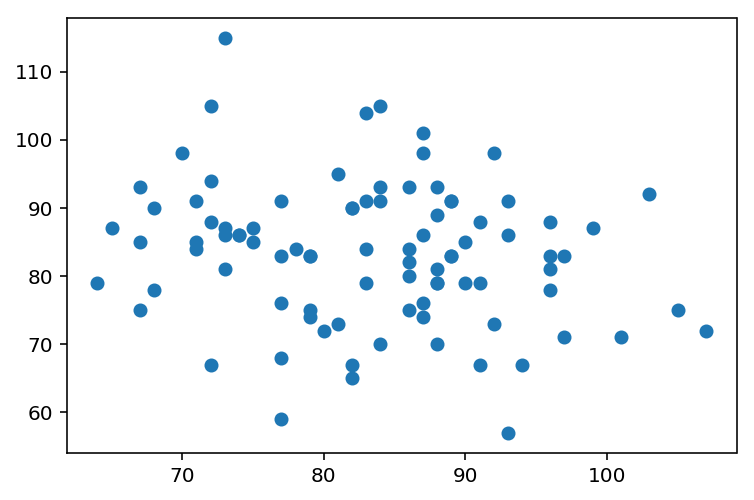

In [12]:
# Goals against vs. goals for
plt.scatter(X['GA'], X['GF'])

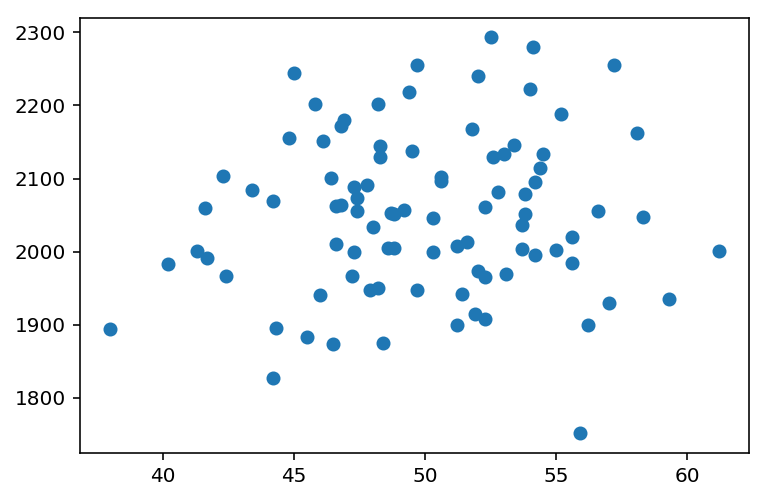

In [14]:
# Goals for percent vs. time on ice
plt.scatter(X['GF%'], X['TOI'])

In [16]:
# honestly looks like there aren't really many viable clusters.

## 4. Scale our data

Standardize the data and compare at least one of the scatterplots for the scaled data to unscaled above.

In [18]:
Xs = StandardScaler().fit_transform(X)
Xs = pd.DataFrame(Xs, columns=X.columns)

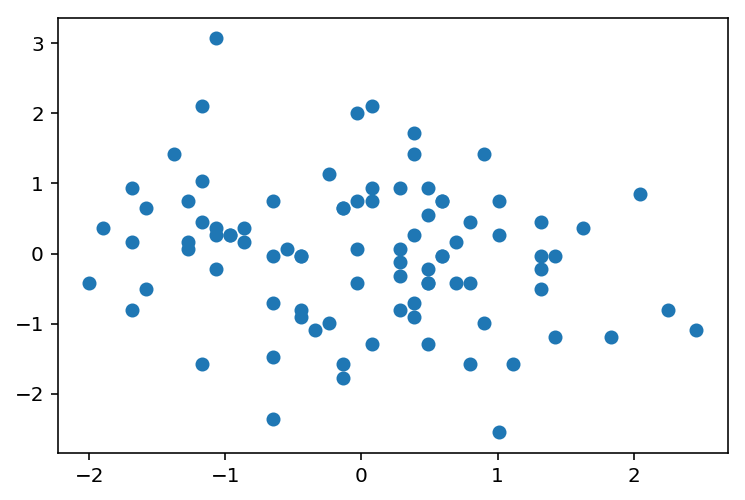

In [20]:
# Goals against vs. goals for
plt.scatter(Xs['GA'], Xs['GF'])

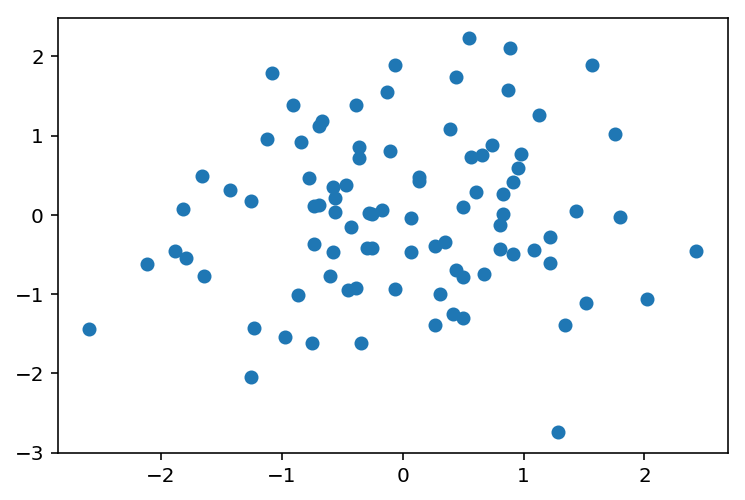

In [21]:
# Goals for percent vs. time on ice
plt.scatter(Xs['GF%'], Xs['TOI'])

### 5. Fit a DBSCAN clusterer

Remember to pass an `eps` and `min_samples` of your choice.

In [24]:
from sklearn.cluster import DBSCAN

dbscn = DBSCAN(eps = 3, min_samples = 3)
dbscan.fit(Xs)

# 'eps' is the max distance between two samples in order for them to be considered in the some cluster.
# min_samples = Minimum number of samples required for a cluster to be considered a cluster.

### 6. Check out the assigned cluster labels

Using the `.labels_` command on our DBSCAN class

In [25]:
labels = dbscn.labels_  
print(labels) # comprehension: what do these mean? How many are there?
# Observations that did not make it into a DB qualified cluster will recieve the label of -1

[ 0  0  0 -1  0 -1 -1 -1 -1  0  0  0 -1 -1  1 -1 -1 -1  0  0 -1  0 -1 -1 -1
 -1 -1  0  0 -1  0  0  0 -1  0  0  0  0  2 -1 -1  0  0 -1  0  0 -1 -1 -1  0
  0 -1 -1 -1  0  0 -1  0  3  0 -1 -1 -1  3 -1  0 -1 -1  4 -1 -1  3  3  0  2
  2  1  0 -1  1 -1  0  2  2  4  0  0  0  4 -1]


In [26]:
# how many clusters do we have?
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print n_clusters_

5


### 7. Evaluate the DBSCAN clusters

**7.1 Check the silhouette score.**

How are the clusters?

If you're feeling adventurous, see how you can adjust our epsilon and min_points to improve this.

In [27]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
# Clusters are terrible.

Silhouette Coefficient: -0.111


**7.2 Check the homogeneity, completeness, and V-measure against the stored rank `y`**

In [28]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))

Estimated number of clusters: 5
Homogeneity: 0.118
Completeness: 0.103
V-measure: 0.110


In [29]:
import numpy as np
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscn.core_sample_indices_] = True 
print(core_samples)

[False  True  True False  True False False False False  True  True False
 False False  True False False False False  True False  True False False
 False False False  True  True False False False  True False  True  True
  True False  True False False  True  True False False  True False False
 False  True  True False False False  True  True False  True  True  True
 False False False  True False  True False False  True False False False
  True False  True False  True  True False  True False False False  True
  True  True  True  True  True False]


### 8. Plot the clusters

You can choose any two variables for the axes.

//anaconda/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


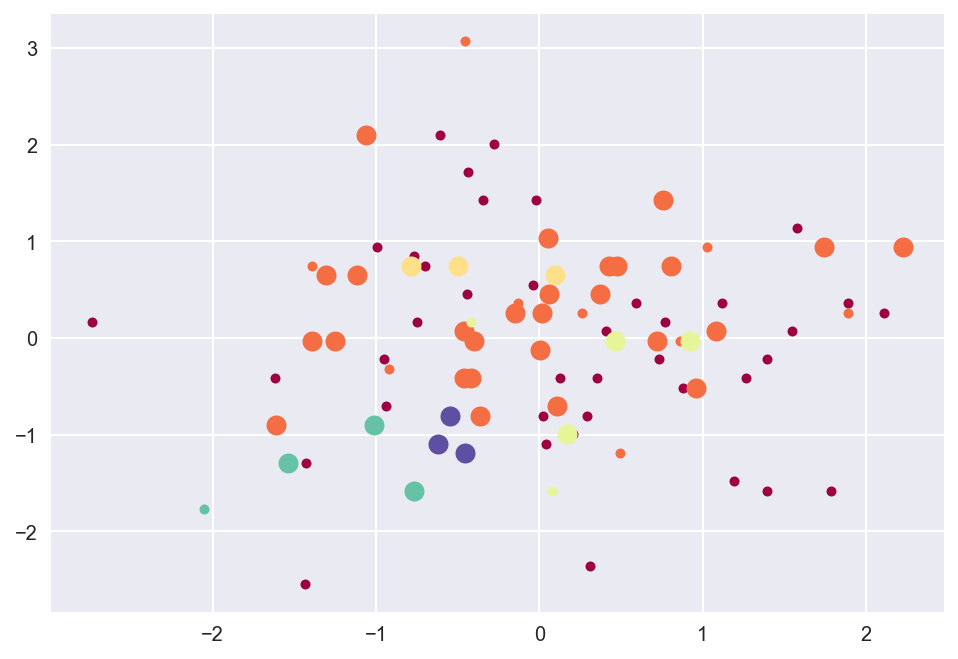

In [30]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    n = Xs.loc[class_member_mask & core_samples, :]
    plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    n = Xs.loc[class_member_mask & ~core_samples, :]
    plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

In [31]:
# DBSCAN may be a poor choice for data that is densely populated in one area,
# yet distant from the rest of our data. Frustratingly, we can't find a good fit 
# because of this! (We may have seen this coming in our scatter plots -- even 
# after the data was scaled.) Perhaps, however, learning we have a number of 
# data points are outside our typical clusters is just the insight we needed.

# In these cases, we have observed a moment where the almighty DBSCAN doesn't
# provide tremendous insight.

# For a picture of what is going on behind the scenes, use our handy DBSCAN 
# visualization tool: www.naftaliharris.com/blog/visualizing-dbscan-clustering/, 
# and select the "Packed Circles" example.

### 9. Fit DBSCAN on an easier dataset

Import the `make_circles` function from `sklearn.datasets`. You can use this to create some fake clusters that will perform well with DBSCAN.

Create some `X` and `y` using the function. Here is some sample code:
```python
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
```

**9.1 Plot the fake circles data.**

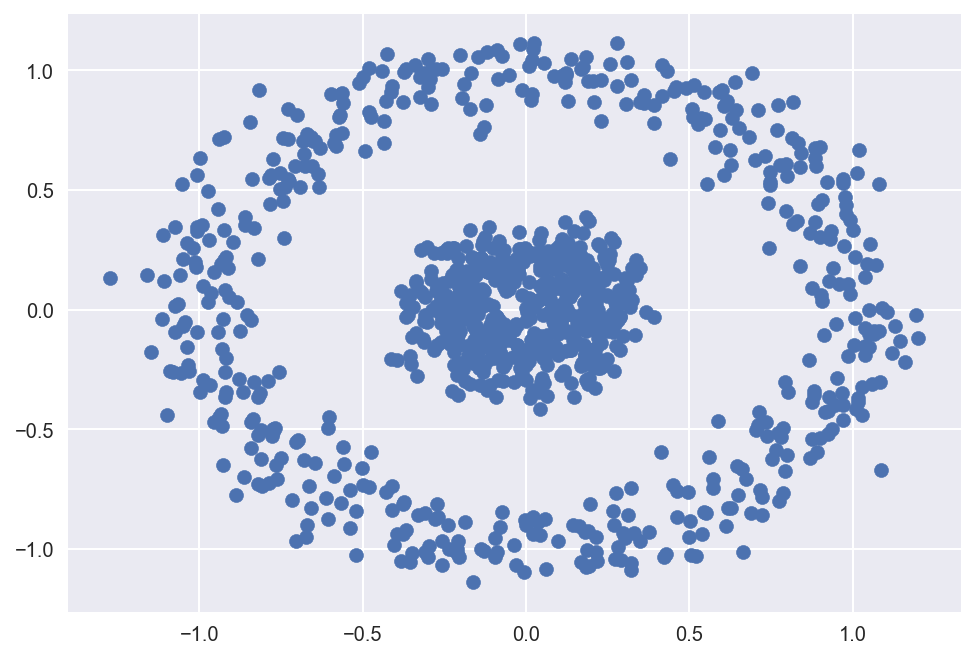

In [32]:
from sklearn.datasets import make_circles
circles_X, circles_y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

plt.scatter(circles_X[:,0], circles_X[:,1])

**9.2 Scale the data and fit DBSCAN on it.**

In [33]:
X = StandardScaler().fit_transform(circles_X)

In [34]:
X.shape

(1000, 2)

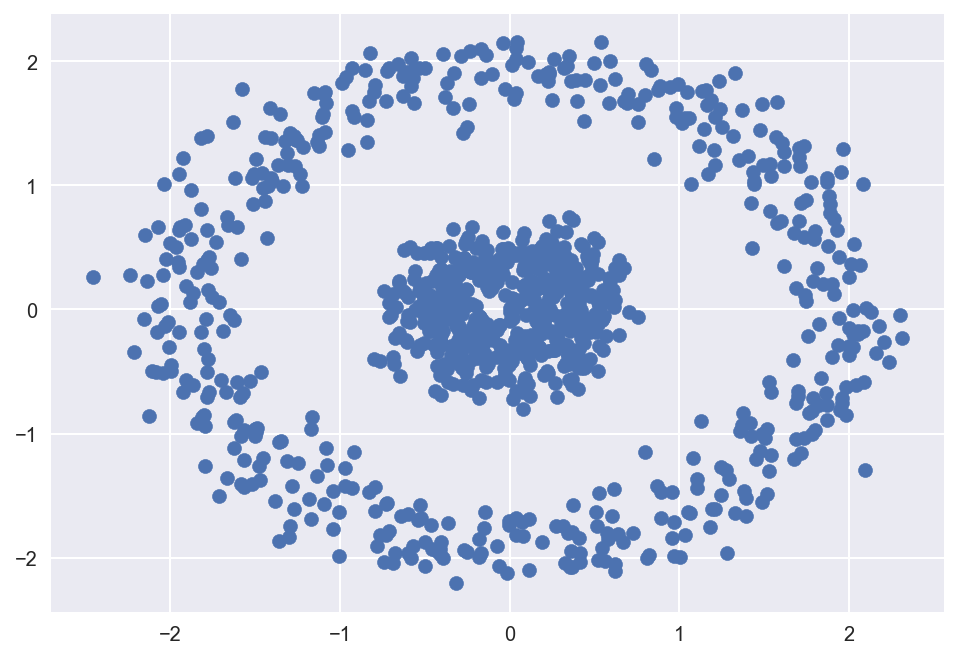

In [35]:
plt.scatter(X[:,0], X[:,1]) #how can we cluster this?!
# This is just me thinking out loud, but an RBF kernel for an SVM would be spot on.

In [36]:
dbscn = DBSCAN(eps = .5, min_samples = 3).fit(X)

In [37]:
labels = dbscn.labels_  
print(labels) # comprehension: what do these mean? How many are there?

[0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 0
 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0
 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0
 1 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0
 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1
 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1
 0 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 0 1
 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 1
 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 1 0 1 1 1
 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 1
 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 0 0
 1 1 1 0 1 0 1 0 0 1 1 1 

In [38]:
# how many clusters do we have?
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print n_clusters_

2


**9.3 Evaluate DBSCAN visually, with silhouette, and with the metrics against the true `y`.**

In [39]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Silhouette Coefficient: 0.238


In [40]:
print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(circles_y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(circles_y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(circles_y, labels))

Estimated number of clusters: 2
Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000


In [41]:
import numpy as np
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscn.core_sample_indices_] = True 
print(core_samples)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

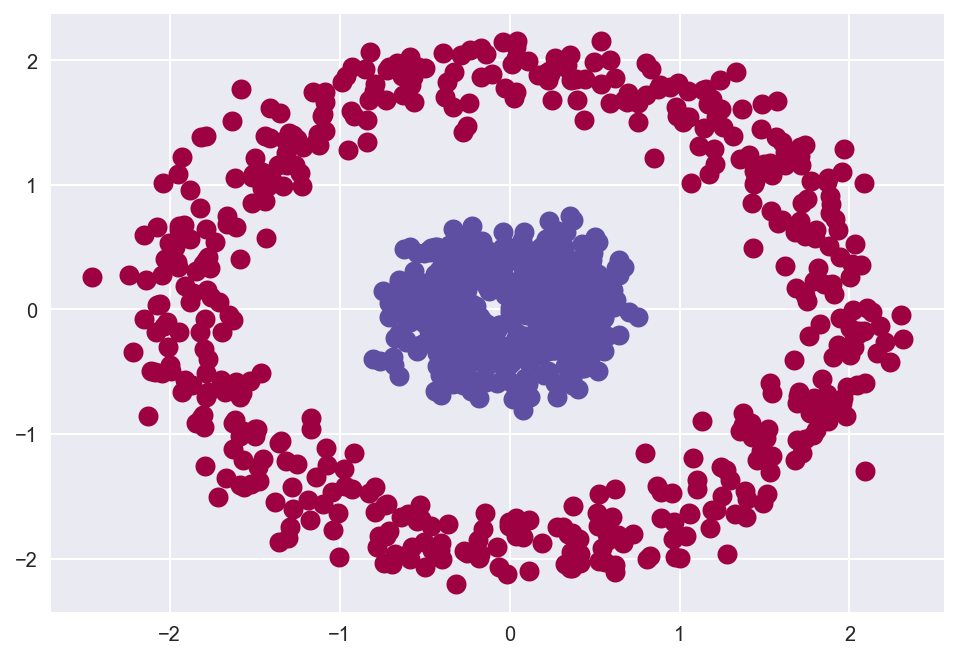

In [42]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    n = X[class_member_mask & core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 10)
    
    n = X[class_member_mask & ~core_samples]
    plt.plot(n[:,0],n[:,1], 'o', markerfacecolor = color, markersize = 5)

In [ ]:
# DBSCAN performs perfectly in this case! When we have anisotropicly or circularly 
# plotted data, we should opt for DBSCAN because KMEANS has a number of 
# assumptions (http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html) 
# that often don't pan out.